# I. Import thư viện

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import islice
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_sample_weight
import pickle
from joblib import dump, load

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# II. Đọc dữ liệu

In [3]:
#df = pd.read_csv('/content/drive/MyDrive/DS317/df.csv')
df = pd.read_csv('D:\Learning\Semester 1 year 4\DS317\Project\Data\Raw_Data_IncludeCTN_For_Models.csv')

# III. Xây dựng mô hình




In [4]:
X = df.drop(columns={'xeploai'})
y = df['xeploai']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
labels = ['Rớt', 'Trung bình', 'Trung bình khá', 'Khá', 'Giỏi', 'Xuất sắc']

In [7]:
def visualization(y_test, y_pred):
  print('Weighted f1_score: ',f1_score(y_test, y_pred, average='weighted'))
  print('Macro f1_score: ',f1_score(y_test, y_pred, average='macro'))
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

In [8]:
def make_results_df(orginal, res_list):
    df_res = pd.DataFrame({
        'Accuracy': [accuracy_score(orginal, u) for u in res_list],
        'Precision': [precision_score(orginal, u, average='macro') for u in res_list],
        'Recall': [recall_score(orginal, u, average='macro') for u in res_list],
        'F1-macro': [f1_score(orginal, u, average='macro') for u in res_list]
    }, index=['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost'])
    return df_res

In [9]:
# Dữ liệu 3 năm học
X_train = X_train.drop(columns=['diem_3_5', 'drl_3_5'])
X_test = X_test.drop(columns=['diem_3_5', 'drl_3_5'])

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6260 entries, 5223 to 7270
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mssv            6260 non-null   int64  
 1   soquyetdinh     6260 non-null   int64  
 2   ngaycapvb       6260 non-null   int64  
 3   namsinh         6260 non-null   float64
 4   gioitinh        6260 non-null   float64
 5   noisinh         6260 non-null   int64  
 6   lopsh           6260 non-null   int64  
 7   khoa            6260 non-null   int64  
 8   hedt            6260 non-null   int64  
 9   khoahoc         6260 non-null   float64
 10  chuyennganh2    6260 non-null   int64  
 11  tinhtrang       6260 non-null   float64
 12  diachi_tinhtp   6260 non-null   int64  
 13  diemnamhoc1     6260 non-null   float64
 14  diemnamhoc2     6260 non-null   float64
 15  diemnamhoc3     6260 non-null   float64
 16  drlnam1         6260 non-null   float64
 17  drlnam2         6260 non-null 

## 1. Xét 3 năm học

### a) Decision Tree

In [11]:
model_dt = DecisionTreeClassifier(random_state=42)

In [12]:
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

Weighted f1_score:  0.920584159195674
Macro f1_score:  0.6930675865560234
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1165
           1       0.83      0.83      0.83        18
           2       0.58      0.64      0.61        50
           3       0.80      0.79      0.80       227
           4       0.74      0.75      0.74       102
           5       0.17      0.25      0.20         4

    accuracy                           0.92      1566
   macro avg       0.68      0.71      0.69      1566
weighted avg       0.92      0.92      0.92      1566



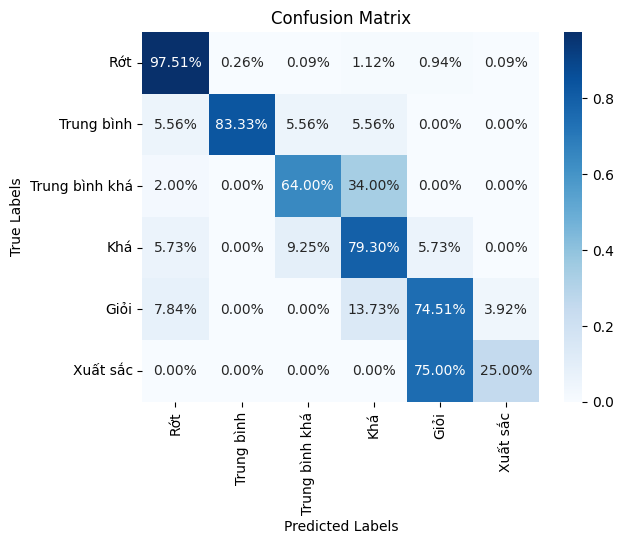

In [13]:
visualization(y_test, y_pred_dt)

### b) Random Forest

In [14]:
model_rf = RandomForestClassifier(random_state=42)

In [15]:
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

Weighted f1_score:  0.9330944673728447
Macro f1_score:  0.6823667178645966
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.89      0.89        18
           2       0.67      0.52      0.58        50
           3       0.80      0.89      0.84       227
           4       0.77      0.82      0.80       102
           5       0.00      0.00      0.00         4

    accuracy                           0.93      1566
   macro avg       0.69      0.68      0.68      1566
weighted avg       0.93      0.93      0.93      1566



c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

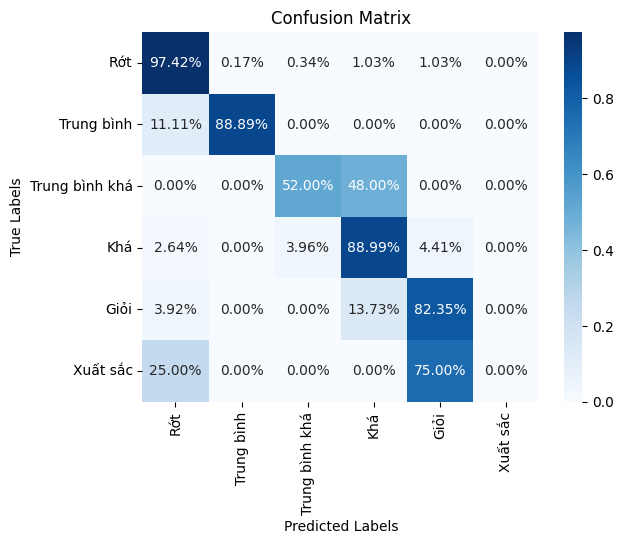

In [16]:
visualization(y_test, y_pred_rf)

### c) XGBoost

In [17]:
model_xg = XGBClassifier(random_state=42)

In [18]:
model_xg.fit(X_train, y_train)
y_pred_xg = model_xg.predict(X_test)

Weighted f1_score:  0.939516702685798
Macro f1_score:  0.6943328991833136
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1165
           1       0.84      0.89      0.86        18
           2       0.71      0.58      0.64        50
           3       0.84      0.88      0.86       227
           4       0.80      0.85      0.82       102
           5       0.00      0.00      0.00         4

    accuracy                           0.94      1566
   macro avg       0.69      0.70      0.69      1566
weighted avg       0.94      0.94      0.94      1566



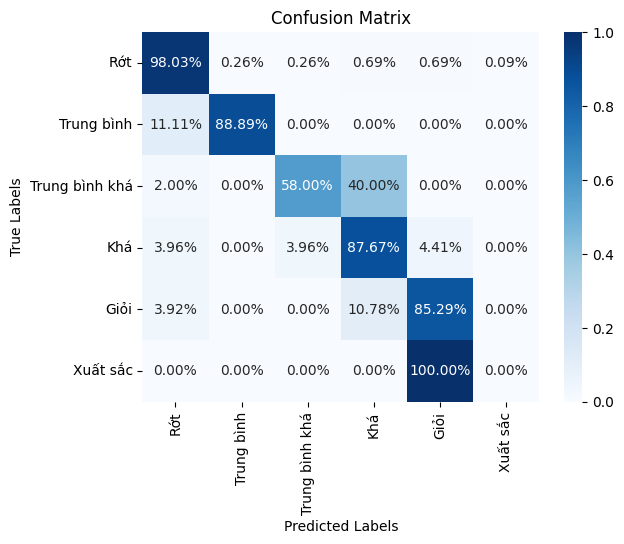

In [19]:
visualization(y_test, y_pred_xg)

### d) LightGBM

In [20]:
model_lgb = lgb.LGBMClassifier(objective='multiclass', num_class=6, random_state=42)

In [21]:
model_lgb.fit(X_train, y_train)
y_pred_lg = model_lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2546
[LightGBM] [Info] Number of data points in the train set: 6260, number of used features: 26
[LightGBM] [Info] Start training from score -0.276878
[LightGBM] [Info] Start training from score -4.209336
[LightGBM] [Info] Start training from score -3.673031
[LightGBM] [Info] Start training from score -1.945112
[LightGBM] [Info] Start training from score -2.861402
[LightGBM] [Info] Start training from score -6.544711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

Weighted f1_score:  0.8129974867171179
Macro f1_score:  0.3925923760751578
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      1165
           1       0.02      0.06      0.02        18
           2       0.19      0.28      0.23        50
           3       0.67      0.68      0.67       227
           4       0.50      0.56      0.53       102
           5       0.00      0.00      0.00         4

    accuracy                           0.79      1566
   macro avg       0.39      0.41      0.39      1566
weighted avg       0.84      0.79      0.81      1566



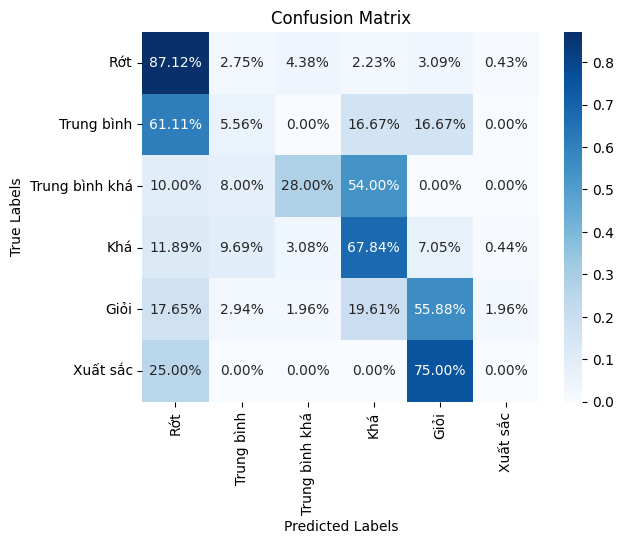

In [22]:
visualization(y_test, y_pred_lg)

### e) CatBoost

In [23]:
model_cb = CatBoostClassifier(random_state=42)

In [24]:
model_cb.fit(X_train, y_train)
y_pred_cb = model_cb.predict(X_test)

Learning rate set to 0.086886
0:	learn: 1.4658869	total: 168ms	remaining: 2m 48s
1:	learn: 1.2543069	total: 187ms	remaining: 1m 33s
2:	learn: 1.1054865	total: 197ms	remaining: 1m 5s
3:	learn: 0.9852100	total: 209ms	remaining: 52s
4:	learn: 0.8901049	total: 216ms	remaining: 43s
5:	learn: 0.8145019	total: 223ms	remaining: 36.9s
6:	learn: 0.7467233	total: 230ms	remaining: 32.6s
7:	learn: 0.6843104	total: 236ms	remaining: 29.2s
8:	learn: 0.6359337	total: 242ms	remaining: 26.7s
9:	learn: 0.5913957	total: 249ms	remaining: 24.6s
10:	learn: 0.5510628	total: 255ms	remaining: 22.9s
11:	learn: 0.5169590	total: 261ms	remaining: 21.5s
12:	learn: 0.4855379	total: 267ms	remaining: 20.3s
13:	learn: 0.4560871	total: 273ms	remaining: 19.2s
14:	learn: 0.4294276	total: 279ms	remaining: 18.3s
15:	learn: 0.4072918	total: 285ms	remaining: 17.5s
16:	learn: 0.3864864	total: 292ms	remaining: 16.9s
17:	learn: 0.3687551	total: 300ms	remaining: 16.4s
18:	learn: 0.3524541	total: 307ms	remaining: 15.9s
19:	learn: 0.

Weighted f1_score:  0.9352779754839355
Macro f1_score:  0.73321178074957
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1165
           1       0.93      0.78      0.85        18
           2       0.68      0.50      0.57        50
           3       0.81      0.90      0.85       227
           4       0.79      0.83      0.81       102
           5       0.50      0.25      0.33         4

    accuracy                           0.94      1566
   macro avg       0.78      0.71      0.73      1566
weighted avg       0.94      0.94      0.94      1566



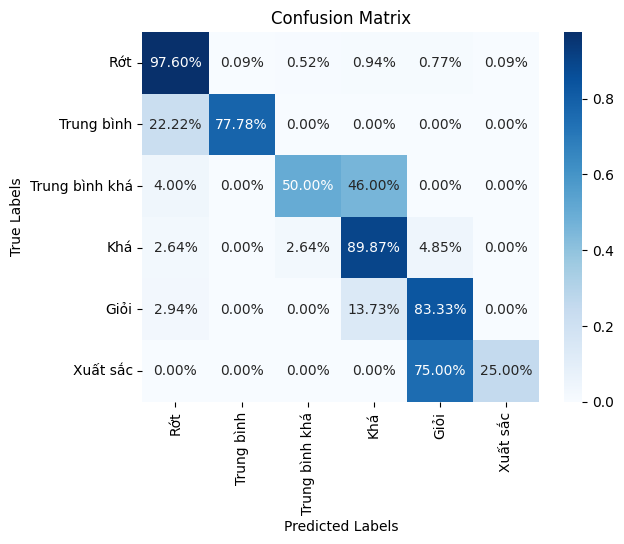

In [25]:
visualization(y_test, y_pred_cb)

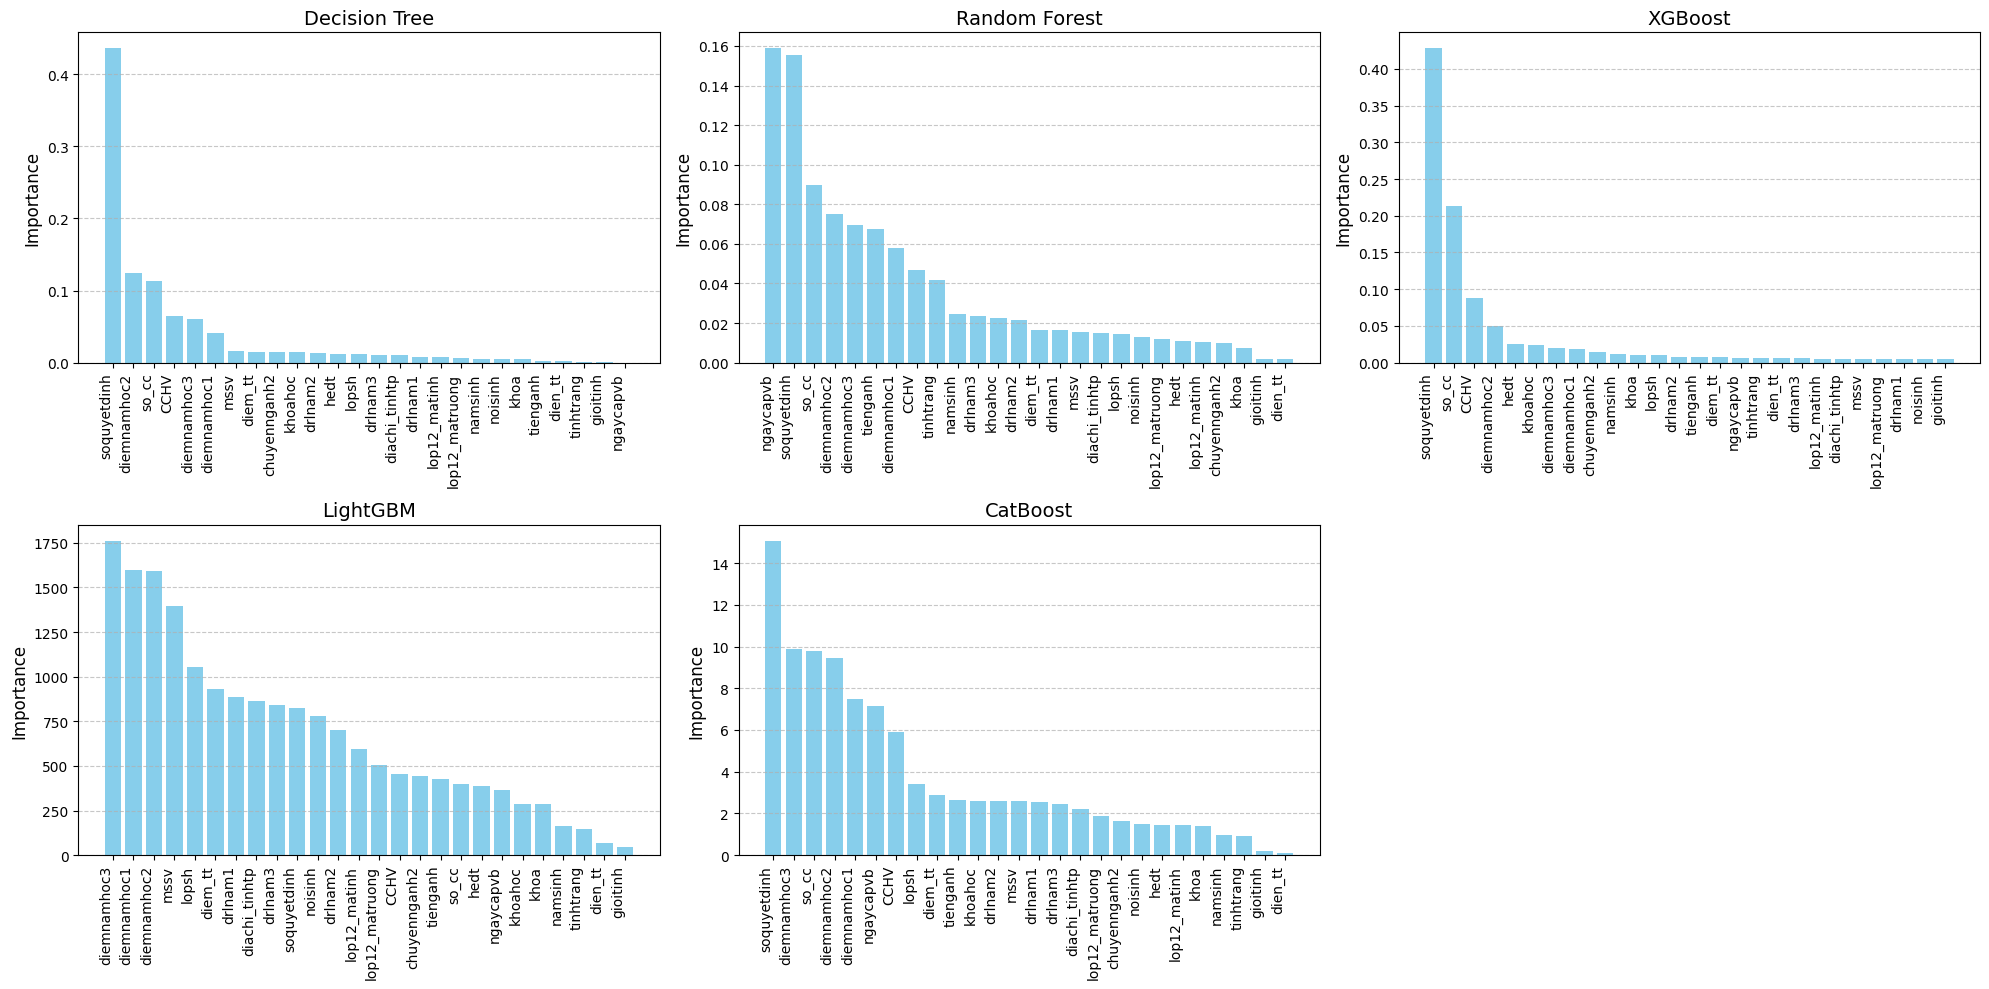

In [26]:
models = [model_dt, model_rf, model_xg, model_lgb, model_cb]  # Danh sách mô hình
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']  # Tên mô hình
feature_names = X_train.columns  # Tên đặc trưng

# Tạo figure và lưới 2x3
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 2 hàng, 3 cột
axes = axes.flatten()  # Duyệt qua các trục như một danh sách

# Vòng lặp qua từng mô hình
for i, model in enumerate(models):
    # Lấy giá trị feature importance từ model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
    sorted_features = [feature_names[idx] for idx in indices]

    # Vẽ biểu đồ bar trên subplot tương ứng
    ax = axes[i]
    ax.bar(range(len(importances)), importances[indices], color='skyblue', align='center')
    ax.set_xticks(range(len(importances)))
    ax.set_xticklabels(sorted_features, rotation=90, ha='right', fontsize=10)
    ax.set_title(model_names[i], fontsize=14)
    ax.set_ylabel('Importance', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Xóa ô thừa (ô trống nếu có)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

# Tự động căn chỉnh bố cục
plt.tight_layout()
plt.show()

# IV. Kết quả

In [27]:
df_res = make_results_df(y_test, [y_pred_dt, y_pred_rf, y_pred_xg, y_pred_lg, y_pred_cb])

c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
df_res

,Accuracy,Precision,Recall,F1-macro
Decision Tree,0.919540,0.683306,0.706082,0.693068
Random Forest,0.934227,0.686077,0.682756,0.682367
XGBoost,0.940613,0.694984,0.696457,0.694333
LightGBM,0.792465,0.385495,0.407340,0.392592
CatBoost,0.936143,0.782092,0.705959,0.733212
